## Gradient

In this notebook, gradient function of `OptiWindNet` is illustrated and tested using simple examples.

Import required packages

In [28]:
from optiwindnet.api import WindFarmNetwork
import numpy as np

In [29]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

Create a sample network with one substation and two wind turbines.

In [30]:
substationsC = np.array([[0, 0]])
turbinesC = np.array([[0, 1], [1, 1]])
borderC = np.array([[-0.1, -0.1], [-0.1, 1.1], [1.1, 1.1], [1.1, -0.1]],
    dtype=float)

Create an instance of WindFarmNetwork based on the defined data.

In [31]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=[(5, 10)], borderC=borderC)

Plot location (without the cabling layout)

<Axes: >

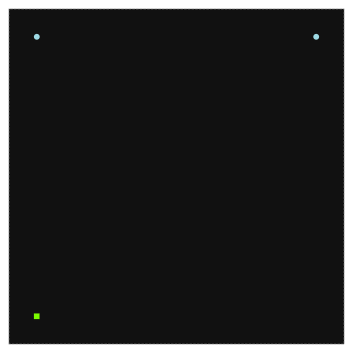

In [32]:
wfn.plot_location()

### Optimize

Run optimization with the default solver.

In [33]:
res_optimize = wfn.optimize()

Plot selected links (from available links)

Plot final layout

<Axes: >

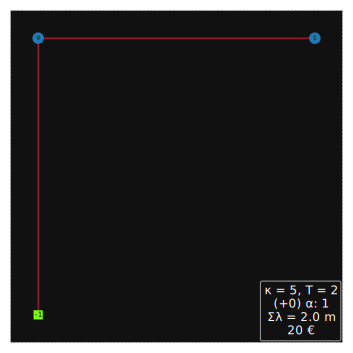

In [34]:
wfn.plot(node_tag=True)

## Calculate gradients
### Gradient of length (default)
Calculate gradient of turbines and substation using gradient() function. The expected gradient values are that moving first WT on x-axis infiniticimally will reduce the total length equally while on y-axis will increase the total length. And accordingly for the other turbine and substaion. The output of gradient() function is matching with the expectation.

In [35]:
grad_wts, grad_ss = wfn.gradient()
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-1.  1.]
 [ 1.  0.]]
SS gradient:  [[ 0. -1.]]


### Gradient of cost

In [36]:
grad_wts, grad_ss = wfn.gradient(gradient_type='cost')
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-10.  10.]
 [ 10.   0.]]
SS gradient:  [[  0. -10.]]


### Gradient with new coordinates

Example 1

In [37]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[0.5, 0],], dtype=float))
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-1.4472136   0.89442719]
 [ 1.          0.        ]]
SS gradient:  [[ 0.4472136  -0.89442719]]


Example 2

In [38]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[-1, 1],], dtype=float))
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[0. 0.]
 [1. 0.]]
SS gradient:  [[-1.  0.]]


> Note:  `.gradient()` will calculate gradients with new coordinate **but do not update the `wfn` object. For example if we plot the layout, original coordinates are depicted. If you need to update `wfn` see the notebook about [WindFarmNetwork class of API](api_01_WindFarmNetwork.ipynb)

<Axes: >

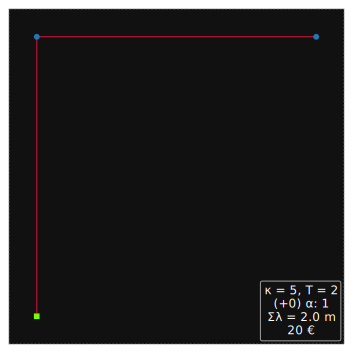

In [39]:
wfn.plot()